In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

patients=pd.read_csv('indian_liver_patient.csv')
#print patients

In [3]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
patients.shape

(583, 11)

In [5]:
patients['Gender']=patients['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [6]:
patients.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


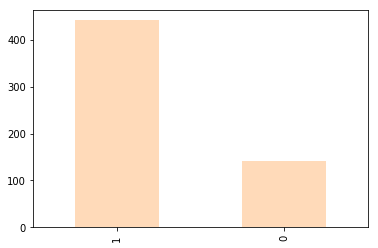

In [7]:
patients['Gender'].value_counts().plot.bar(color='peachpuff')

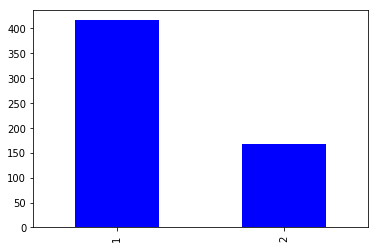

In [8]:
patients['Dataset'].value_counts().plot.bar(color='blue')


In [9]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
patients['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [11]:
patients=patients.fillna(0.94)

In [12]:
patients.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

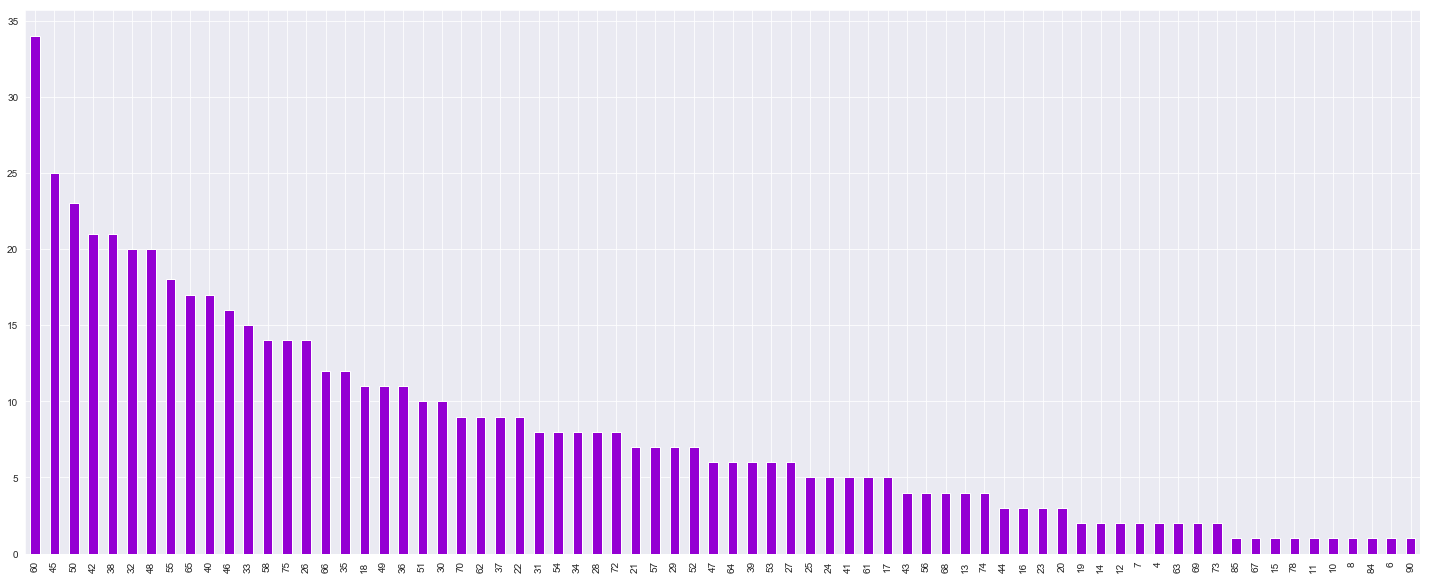

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
patients['Age'].value_counts().plot.bar(color='darkviolet')

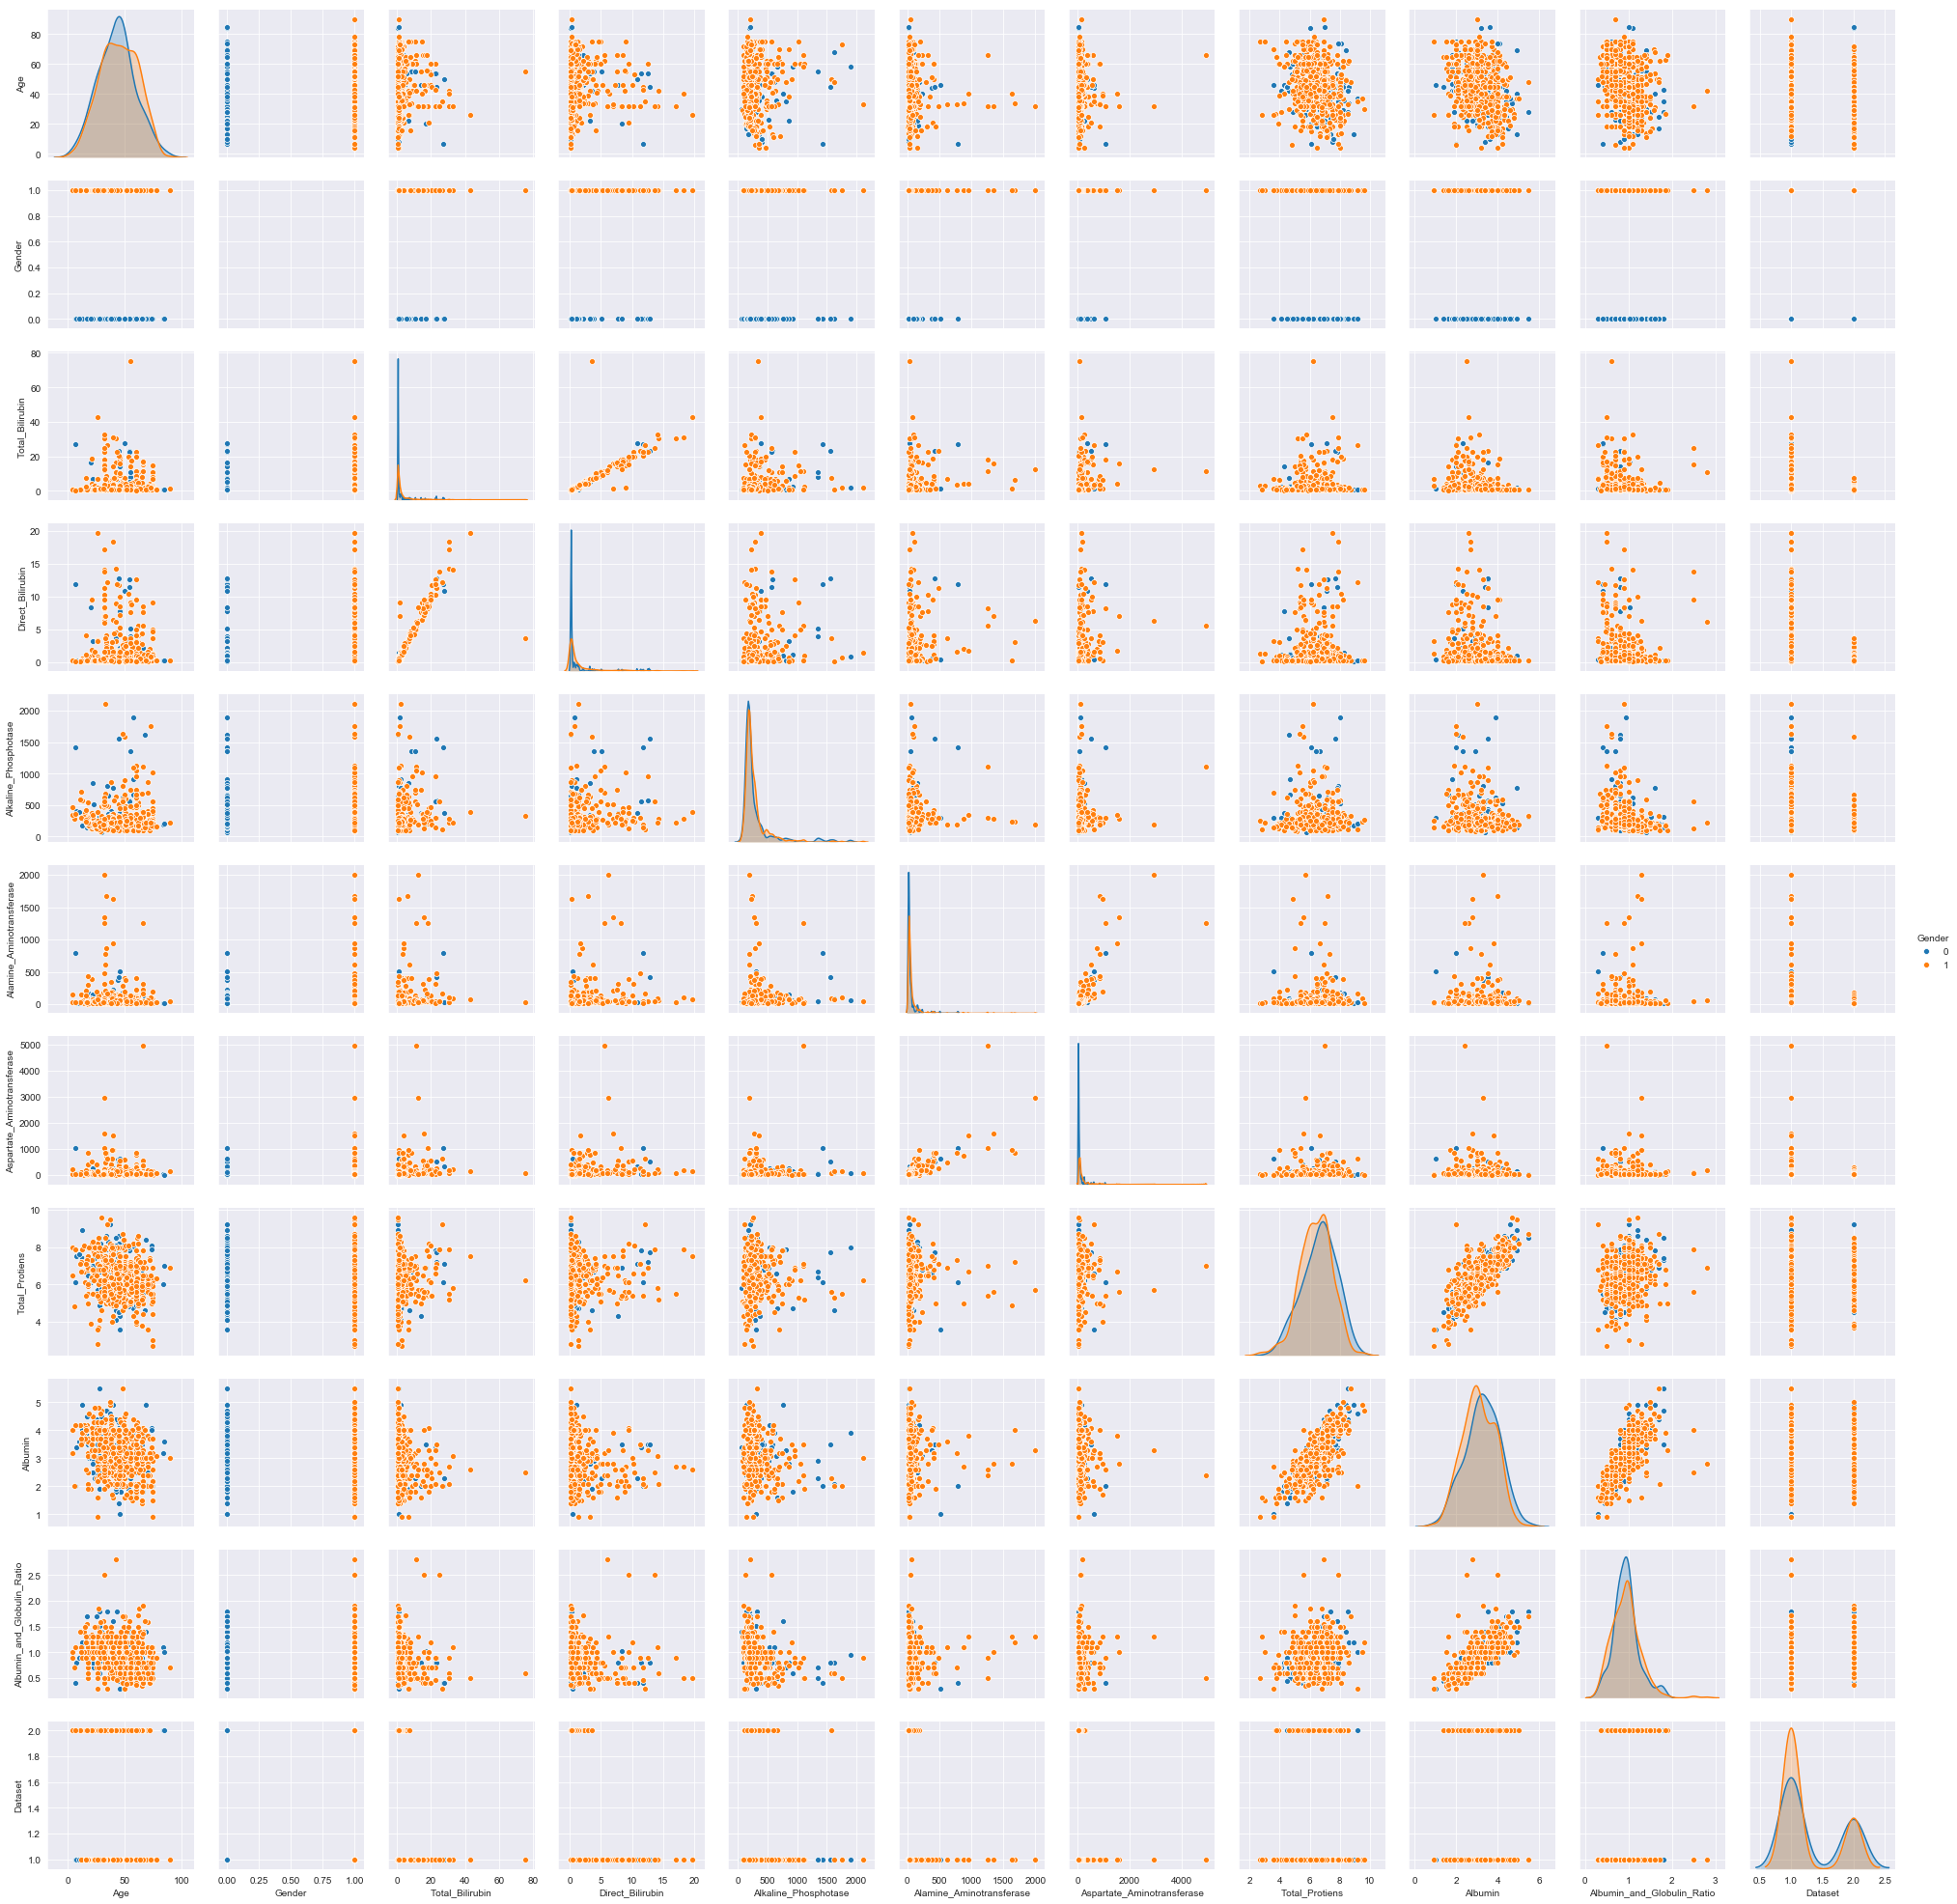

In [14]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients,hue='Gender')

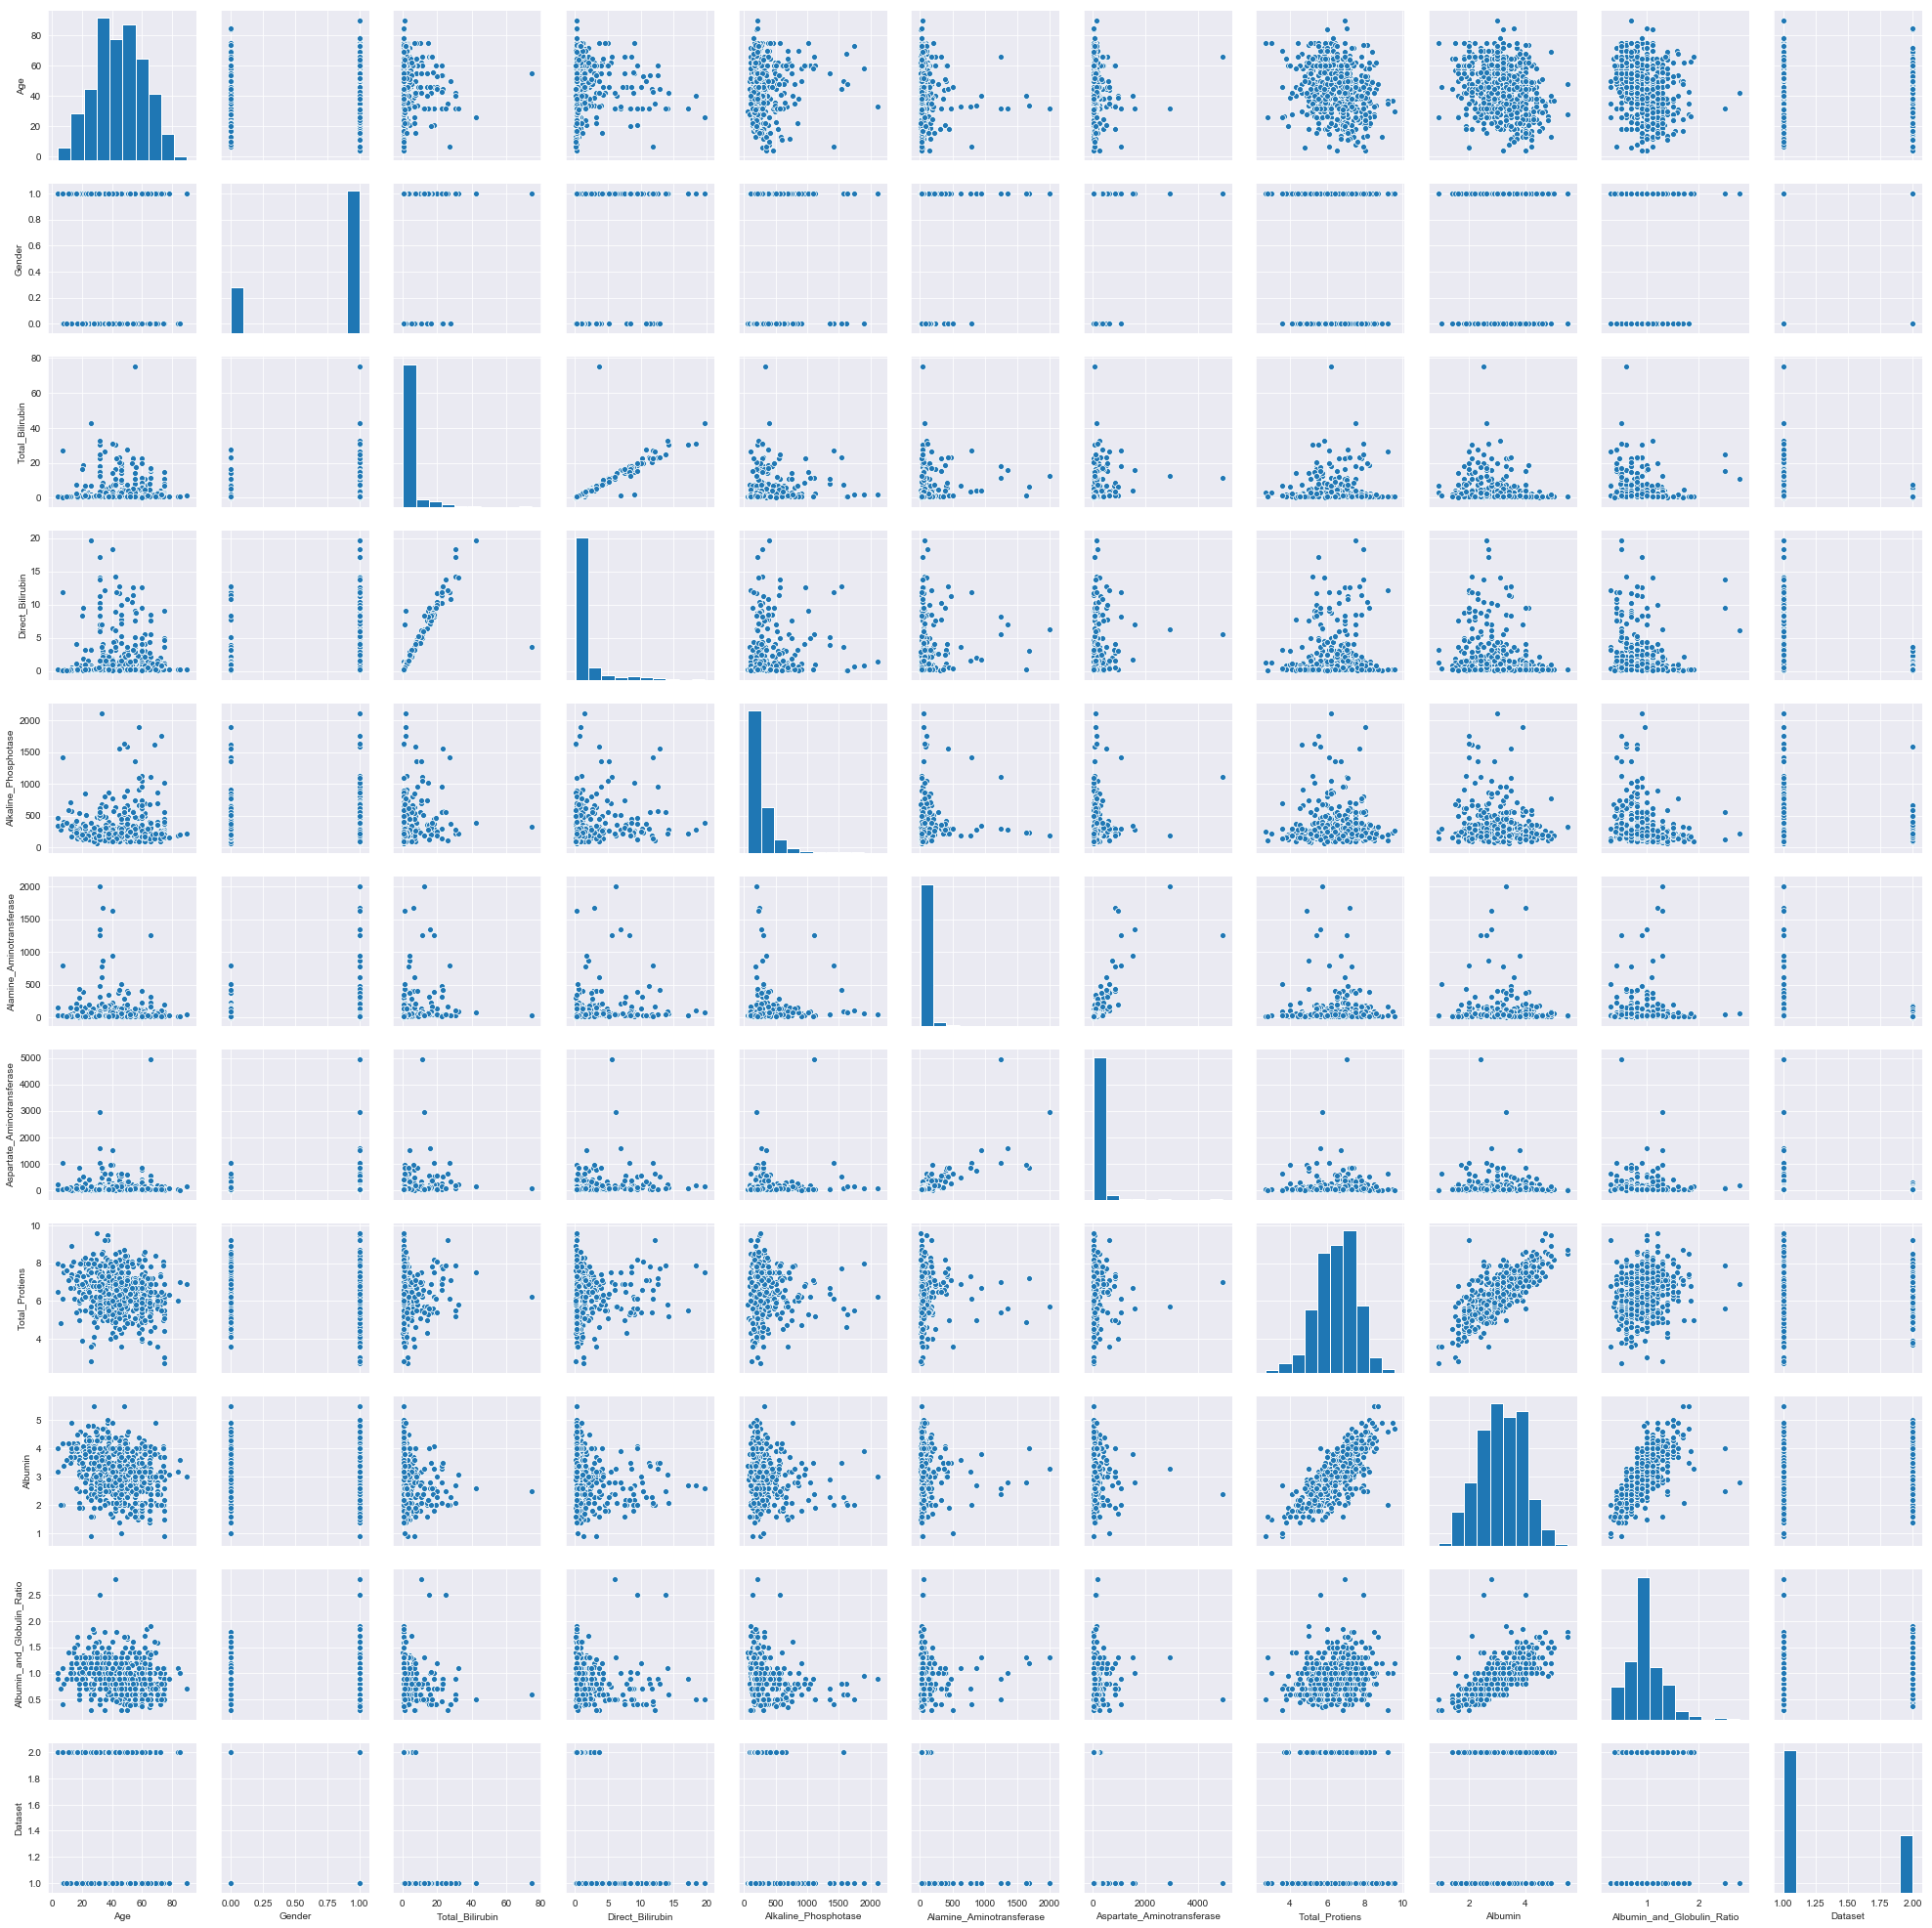

In [15]:
sns.pairplot(patients)

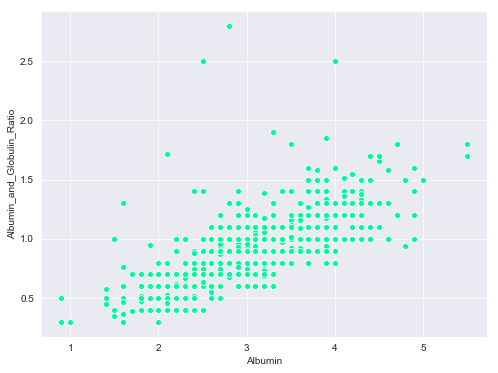

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=patients);
plt.show()

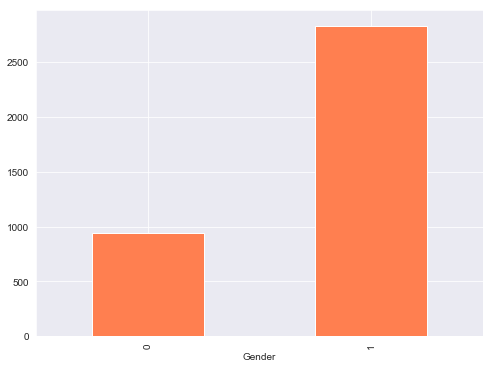

In [17]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

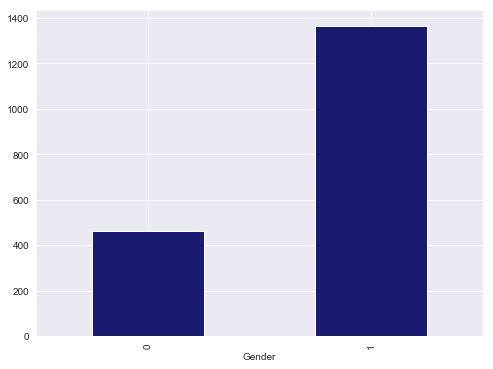

In [18]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

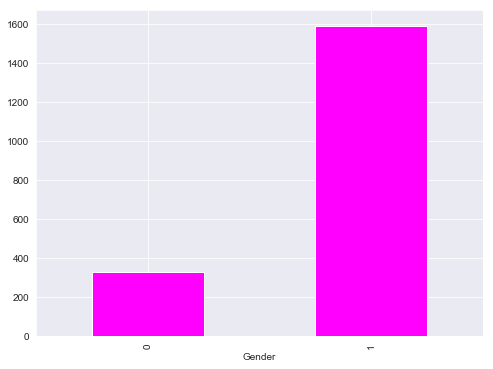

In [19]:
plt.figure(figsize=(8,6))
patients.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

In [20]:
corr=patients.corr()

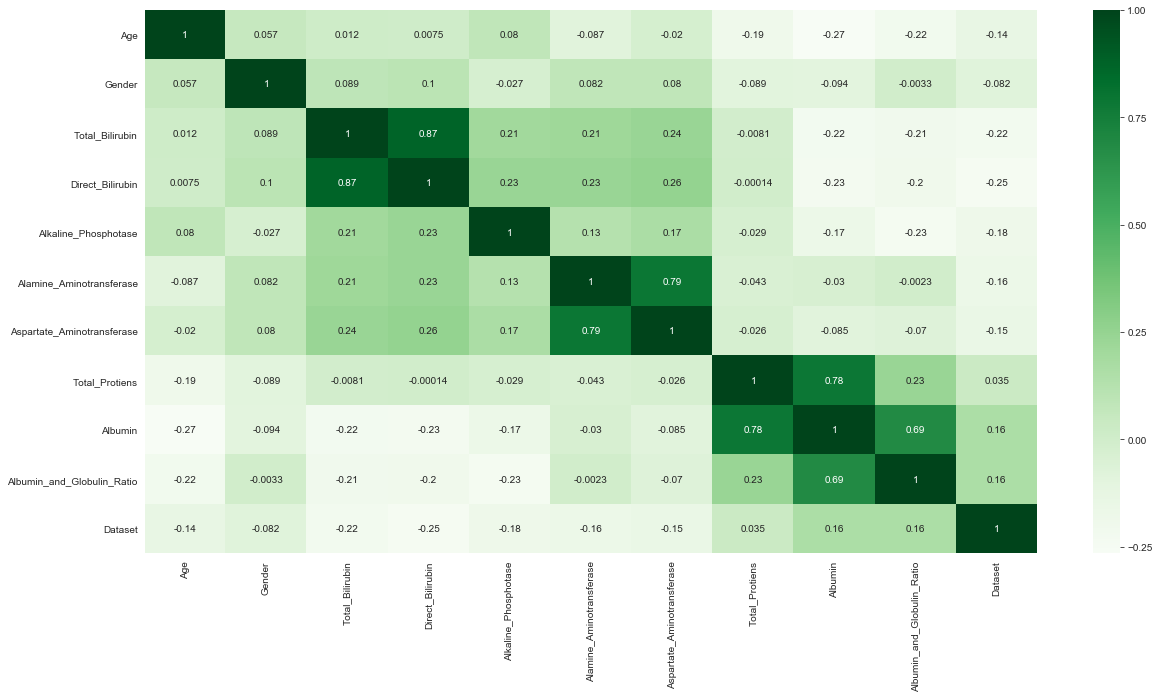

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
patients.columns

Index([u'Age', u'Gender', u'Total_Bilirubin', u'Direct_Bilirubin',
       u'Alkaline_Phosphotase', u'Alamine_Aminotransferase',
       u'Aspartate_Aminotransferase', u'Total_Protiens', u'Albumin',
       u'Albumin_and_Globulin_Ratio', u'Dataset'],
      dtype='object')

In [24]:
X=patients[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=patients['Dataset']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,random_state=42)
logmodel = LogisticRegression(C=1, penalty='l1')
results = cross_val_score(logmodel, X_train,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.68292683 0.73170732 0.62195122 0.71604938 0.82716049]
('Accuracy:', 71.59590484793738)


In [28]:
# SVM
from sklearn.svm import SVC
#from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
svc = SVC()
#svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

('Accuracy : ', 0.7314285714285714)


In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [30]:
print X_res.shape
print y_res.shape


(832, 10)
(832,)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=123)

In [34]:
# SVM
from sklearn.svm import SVC
#from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
svc = SVC()
#svc = svm.SVC(kernel='rbf')
svc_load =svc.fit(X_train, y_train)


In [35]:

y_pred = svc.predict(X_test)

print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

('Accuracy : ', 0.732)


In [36]:
from sklearn.externals import joblib
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

In [37]:
filename = './liver_SVM.joblib.pkl'

In [38]:
 _ = joblib.dump(svc_load, filename, compress=9)